In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = 'https://raw.githubusercontent.com/Pollutants/Datasets/main/Jul_2017-Nov-2022_8hrs_PollutionData.csv'
df = pd.read_csv(url, engine='python', parse_dates=True)
df.index.freq='D'

In [5]:
del df['To Date']
df

,From Date,PM2.5
0,01-07-2017 00:00,28.30
1,01-07-2017 08:00,31.23
2,01-07-2017 16:00,45.17
3,02-07-2017 00:00,34.57
4,02-07-2017 08:00,40.26
...,...,...
5871,09-11-2022 00:00,52.03
5872,09-11-2022 08:00,55.35
5873,09-11-2022 16:00,60.77
5874,10-11-2022 00:00,76.84


In [6]:
x = df["From Date"]
y = df["PM2.5"]
plt.figure(figsize=(14,7))
plt.plot(x, y)

Error in callback <function flush_figures at 0x7f8d95b74050> (for post_execute):


KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


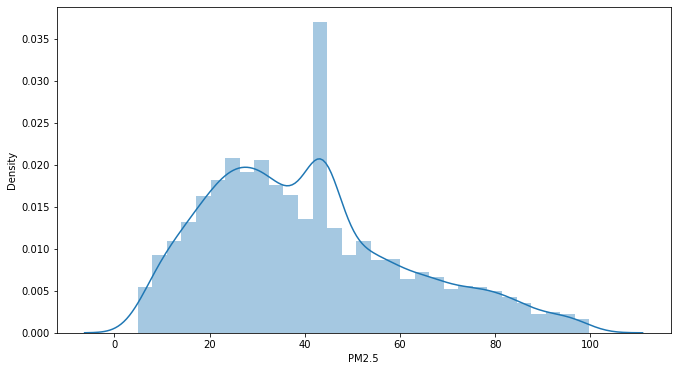

In [27]:
sns.distplot(df['PM2.5'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


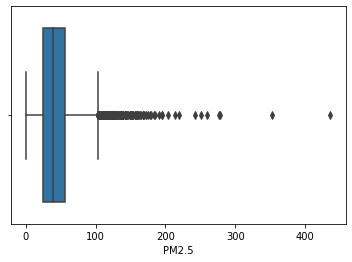

In [8]:
sns.boxplot(df['PM2.5'])

In [9]:
upper_limit = df['PM2.5'].quantile(0.95)
lower_limit = df['PM2.5'].quantile(0.01)

In [10]:
new_df = df[(df['PM2.5'] <= upper_limit) & (df['PM2.5'] >= lower_limit)]
new_df

,From Date,PM2.5
0,01-07-2017 00:00,28.30
1,01-07-2017 08:00,31.23
2,01-07-2017 16:00,45.17
3,02-07-2017 00:00,34.57
4,02-07-2017 08:00,40.26
...,...,...
5871,09-11-2022 00:00,52.03
5872,09-11-2022 08:00,55.35
5873,09-11-2022 16:00,60.77
5874,10-11-2022 00:00,76.84


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


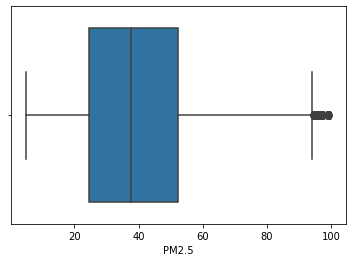

In [11]:
df = new_df
sns.boxplot(df['PM2.5'])

In [12]:
x = df["From Date"]
y = df["PM2.5"]
plt.figure(figsize=(14,7))
plt.plot(x, y)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f8d95b6d560> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f8d95b74050> (for post_execute):


KeyboardInterrupt: ignored

In [13]:
def title(val):
  return ('Pollution'+str(val)+'DaysAgo')

for i in range(8):
  if i==0:
    continue
  else:
    df[title(i)]=df['PM2.5'].shift(+i)

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,From Date,PM2.5,Pollution1DaysAgo,Pollution2DaysAgo,Pollution3DaysAgo,Pollution4DaysAgo,Pollution5DaysAgo,Pollution6DaysAgo,Pollution7DaysAgo
0,01-07-2017 00:00,28.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-07-2017 08:00,31.23,28.30,NaN,NaN,NaN,NaN,NaN,NaN
2,01-07-2017 16:00,45.17,31.23,28.30,NaN,NaN,NaN,NaN,NaN
3,02-07-2017 00:00,34.57,45.17,31.23,28.30,NaN,NaN,NaN,NaN
4,02-07-2017 08:00,40.26,34.57,45.17,31.23,28.30,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5871,09-11-2022 00:00,52.03,64.08,69.38,96.06,85.90,83.79,82.19,60.73
5872,09-11-2022 08:00,55.35,52.03,64.08,69.38,96.06,85.90,83.79,82.19
5873,09-11-2022 16:00,60.77,55.35,52.03,64.08,69.38,96.06,85.90,83.79
5874,10-11-2022 00:00,76.84,60.77,55.35,52.03,64.08,69.38,96.06,85.90


In [14]:
df=df.dropna()
df

,From Date,PM2.5,Pollution1DaysAgo,Pollution2DaysAgo,Pollution3DaysAgo,Pollution4DaysAgo,Pollution5DaysAgo,Pollution6DaysAgo,Pollution7DaysAgo
7,03-07-2017 08:00,40.32,28.44,46.94,40.26,34.57,45.17,31.23,28.30
8,03-07-2017 16:00,59.46,40.32,28.44,46.94,40.26,34.57,45.17,31.23
9,04-07-2017 00:00,38.48,59.46,40.32,28.44,46.94,40.26,34.57,45.17
10,04-07-2017 08:00,47.38,38.48,59.46,40.32,28.44,46.94,40.26,34.57
11,04-07-2017 16:00,53.23,47.38,38.48,59.46,40.32,28.44,46.94,40.26
...,...,...,...,...,...,...,...,...,...
5871,09-11-2022 00:00,52.03,64.08,69.38,96.06,85.90,83.79,82.19,60.73
5872,09-11-2022 08:00,55.35,52.03,64.08,69.38,96.06,85.90,83.79,82.19
5873,09-11-2022 16:00,60.77,55.35,52.03,64.08,69.38,96.06,85.90,83.79
5874,10-11-2022 00:00,76.84,60.77,55.35,52.03,64.08,69.38,96.06,85.90


In [15]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [16]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [17]:
import numpy as np
x1,x2,x3,x4,x5,x6,x7,y=df['Pollution1DaysAgo'],df['Pollution2DaysAgo'],df['Pollution3DaysAgo'],df['Pollution4DaysAgo'],df['Pollution5DaysAgo'],df['Pollution6DaysAgo'],df['Pollution7DaysAgo'],df['PM2.5']
x1,x2,x3,x4,x5,x6,x7,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(y)
x1,x2,x3,x4,x5,x6,x7,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),x6.reshape(-1,1),x7.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3,x4,x5,x6,x7),axis=1)

final_x

array([[28.44, 46.94, 40.26, ..., 45.17, 31.23, 28.3 ],
       [40.32, 28.44, 46.94, ..., 34.57, 45.17, 31.23],
       [59.46, 40.32, 28.44, ..., 40.26, 34.57, 45.17],
       ...,
       [55.35, 52.03, 64.08, ..., 96.06, 85.9 , 83.79],
       [60.77, 55.35, 52.03, ..., 69.38, 96.06, 85.9 ],
       [76.84, 60.77, 55.35, ..., 64.08, 69.38, 96.06]])

In [18]:
X_train,X_test,y_train,y_test=final_x[:-268],final_x[-268:],y[:-268],y[-268:]

In [19]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


LinearRegression()

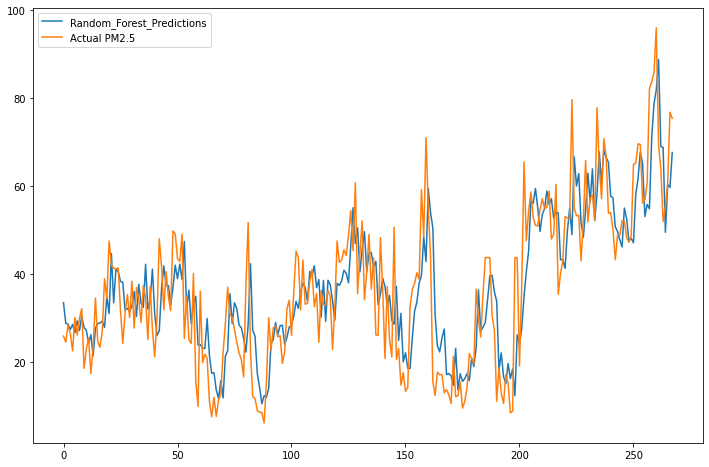

In [20]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual PM2.5')
plt.legend(loc="upper left")
plt.show()

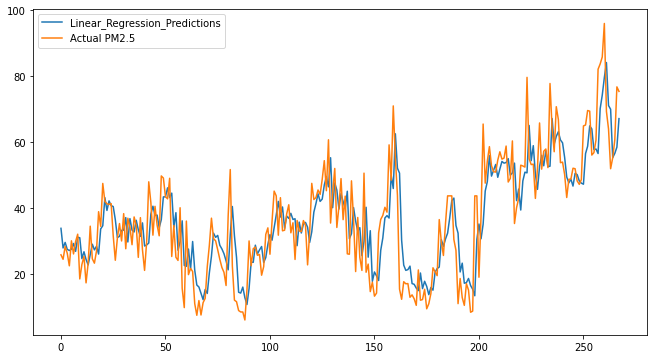

In [21]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual PM2.5')
plt.legend(loc="upper left")
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [23]:
print('Mean Squared Error for Random Forest Model is:',(mean_squared_error(pred,y_test)))
print('Mean Squared Error for Linear Regression Model is:',(mean_squared_error(lin_pred,y_test)))

Mean Squared Error for Random Forest Model is: 95.08403362462688
Mean Squared Error for Linear Regression Model is: 89.55699828214517


In [24]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 9.751104225913437
Mean Squared Error for Linear Regression Model is: 9.463455937560294


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
mae = mean_absolute_error(lin_pred, y_test)
mae


7.031757019928341